In [101]:
!pip install numpy==1.22.4
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import glob
import random
from scipy.fft import rfft, rfftfreq, fft, ifft, fftshift
from scipy.signal import lfilter, butter, iirnotch
from scipy import signal
import statistics
from sympy import symbols, diff
import matplotlib.patches as patches

Defaulting to user installation because normal site-packages is not writeable


In [4]:
sampling_frequency_emg = 1000
sampling_frequency_G_A = 500
frame = 256
step = 128

In [149]:
n = random.randint(0,40)
n = 7
if n<=9:
    n = "0"+str(n)
else:
    n = str(n)
dr =  pd.read_csv("raw/AB188_Circuit_0"+n+"_raw.csv", header = 0, na_values=["?"])
dr

,Right_Shank_Ax,Right_Shank_Ay,Right_Shank_Az,Right_Shank_Gy,Right_Shank_Gz,Right_Shank_Gx,Right_Thigh_Ax,Right_Thigh_Ay,Right_Thigh_Az,Right_Thigh_Gy,...,Left_SOL,Left_BF,Left_ST,Left_VL,Left_RF,Right_Ankle,Right_Knee,Left_Ankle,Left_Knee,Mode
0,-1.160220,-0.151904,0.458762,0.003891,-0.012589,0.026017,-0.282521,0.282368,1.227512,-0.005570,...,-0.107042,-0.083238,-0.076829,-0.054246,-0.054093,2.085069,2.920043,2.131456,0.905852,0
1,-1.160220,-0.146715,0.460594,0.003738,-0.012589,0.026627,-0.277028,0.280232,1.219577,-0.006790,...,-0.117418,-0.084306,-0.078355,-0.038376,-0.046464,2.085069,2.920043,2.131456,0.905852,0
2,-1.160220,-0.146715,0.460594,0.003738,-0.012589,0.026627,-0.277028,0.280232,1.219577,-0.006790,...,-0.125811,-0.087053,-0.067826,-0.044785,-0.051347,2.082628,2.917601,2.129015,0.903410,0
3,-1.156252,-0.155871,0.460288,0.002670,-0.011063,0.027543,-0.283742,0.285115,1.218051,-0.005722,...,-0.115282,-0.090105,-0.063554,-0.061723,-0.063249,2.082628,2.917601,2.129015,0.903410,0
4,-1.156252,-0.155871,0.460288,0.002670,-0.011063,0.027543,-0.283742,0.285115,1.218051,-0.005722,...,-0.097276,-0.091020,-0.063859,-0.076219,-0.076371,2.085069,2.920043,2.131456,0.903410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28495,-1.175479,-0.136339,0.378805,0.003738,0.005875,-0.026780,-0.157092,0.358663,1.200961,0.001755,...,-0.103685,-0.090562,-0.065537,-0.055467,-0.058976,2.053330,2.900511,2.136339,0.925383,0
28496,-1.175479,-0.136339,0.378805,0.003738,0.005875,-0.026780,-0.157092,0.358663,1.200961,0.001755,...,-0.099870,-0.090715,-0.075303,-0.074998,-0.072099,2.055772,2.902953,2.136339,0.925383,0
28497,-1.173953,-0.137865,0.375448,0.001450,0.004196,-0.024643,-0.158007,0.354086,1.205234,0.005264,...,-0.088121,-0.090105,-0.083696,-0.080339,-0.082780,2.055772,2.902953,2.136339,0.925383,0
28498,-1.173953,-0.137865,0.375448,0.001450,0.004196,-0.024643,-0.158007,0.354086,1.205234,0.005264,...,-0.081254,-0.082475,-0.087663,-0.076982,-0.081254,2.055772,2.902953,2.133898,0.927825,0


In [150]:
t_max = float(len((dr['Mode']) - 1)*(1/1000))  # длительность сигнала, sampling_count*sampling step in seconds
t = np.linspace(0, t_max, len(dr['Mode']), endpoint=True)  # временная линия
dr1 = dr[dr.columns[8]].to_numpy()
data_FFT = np.fft.rfft(dr)
frq = rfftfreq(len((dr['Mode']) - 1), 1 / 1000)

Text(0.5, 1.0, 'Right_Thigh_Az')

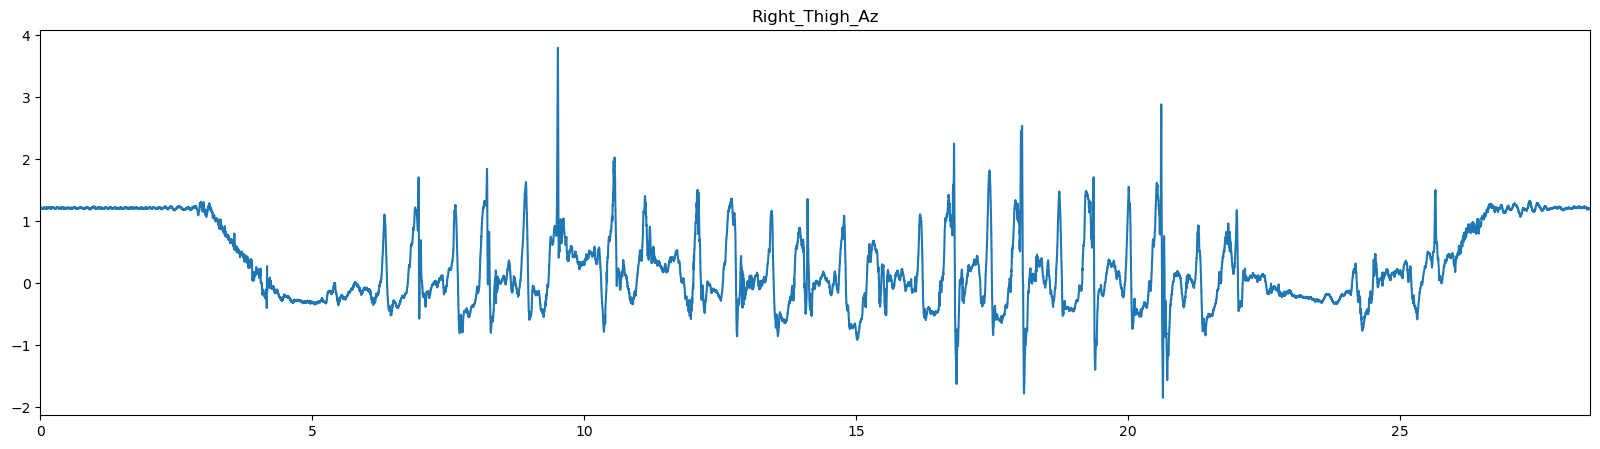

In [151]:
fig_1 = plt.figure(figsize=(20, 5))
plt.plot(t, dr1)
#plt.xlabel('Время, с')
plt.xlim(0, t_max)
#plt.ylabel('Амплитуда, В')
plt.title(dr.columns[8])

In [152]:
#dr = data_raw.copy()
slice1 = dr.loc[:, 'Right_Thigh_Ax':'Right_Thigh_Gx']
slice2 = dr['Right_Knee']
#slice3 = dr['Right_Knee_Velocity']
slice4 = dr.loc[:, 'Right_BF':'Right_RF']
slice5 = dr.loc[:, 'Mode']
#slices = [slice1, slice2, slice3, slice4, slice5]
slices = [slice1, slice2, slice4, slice5]
dr = pd.concat(slices, axis = 1, )
dr.reset_index(drop=True, inplace=True)

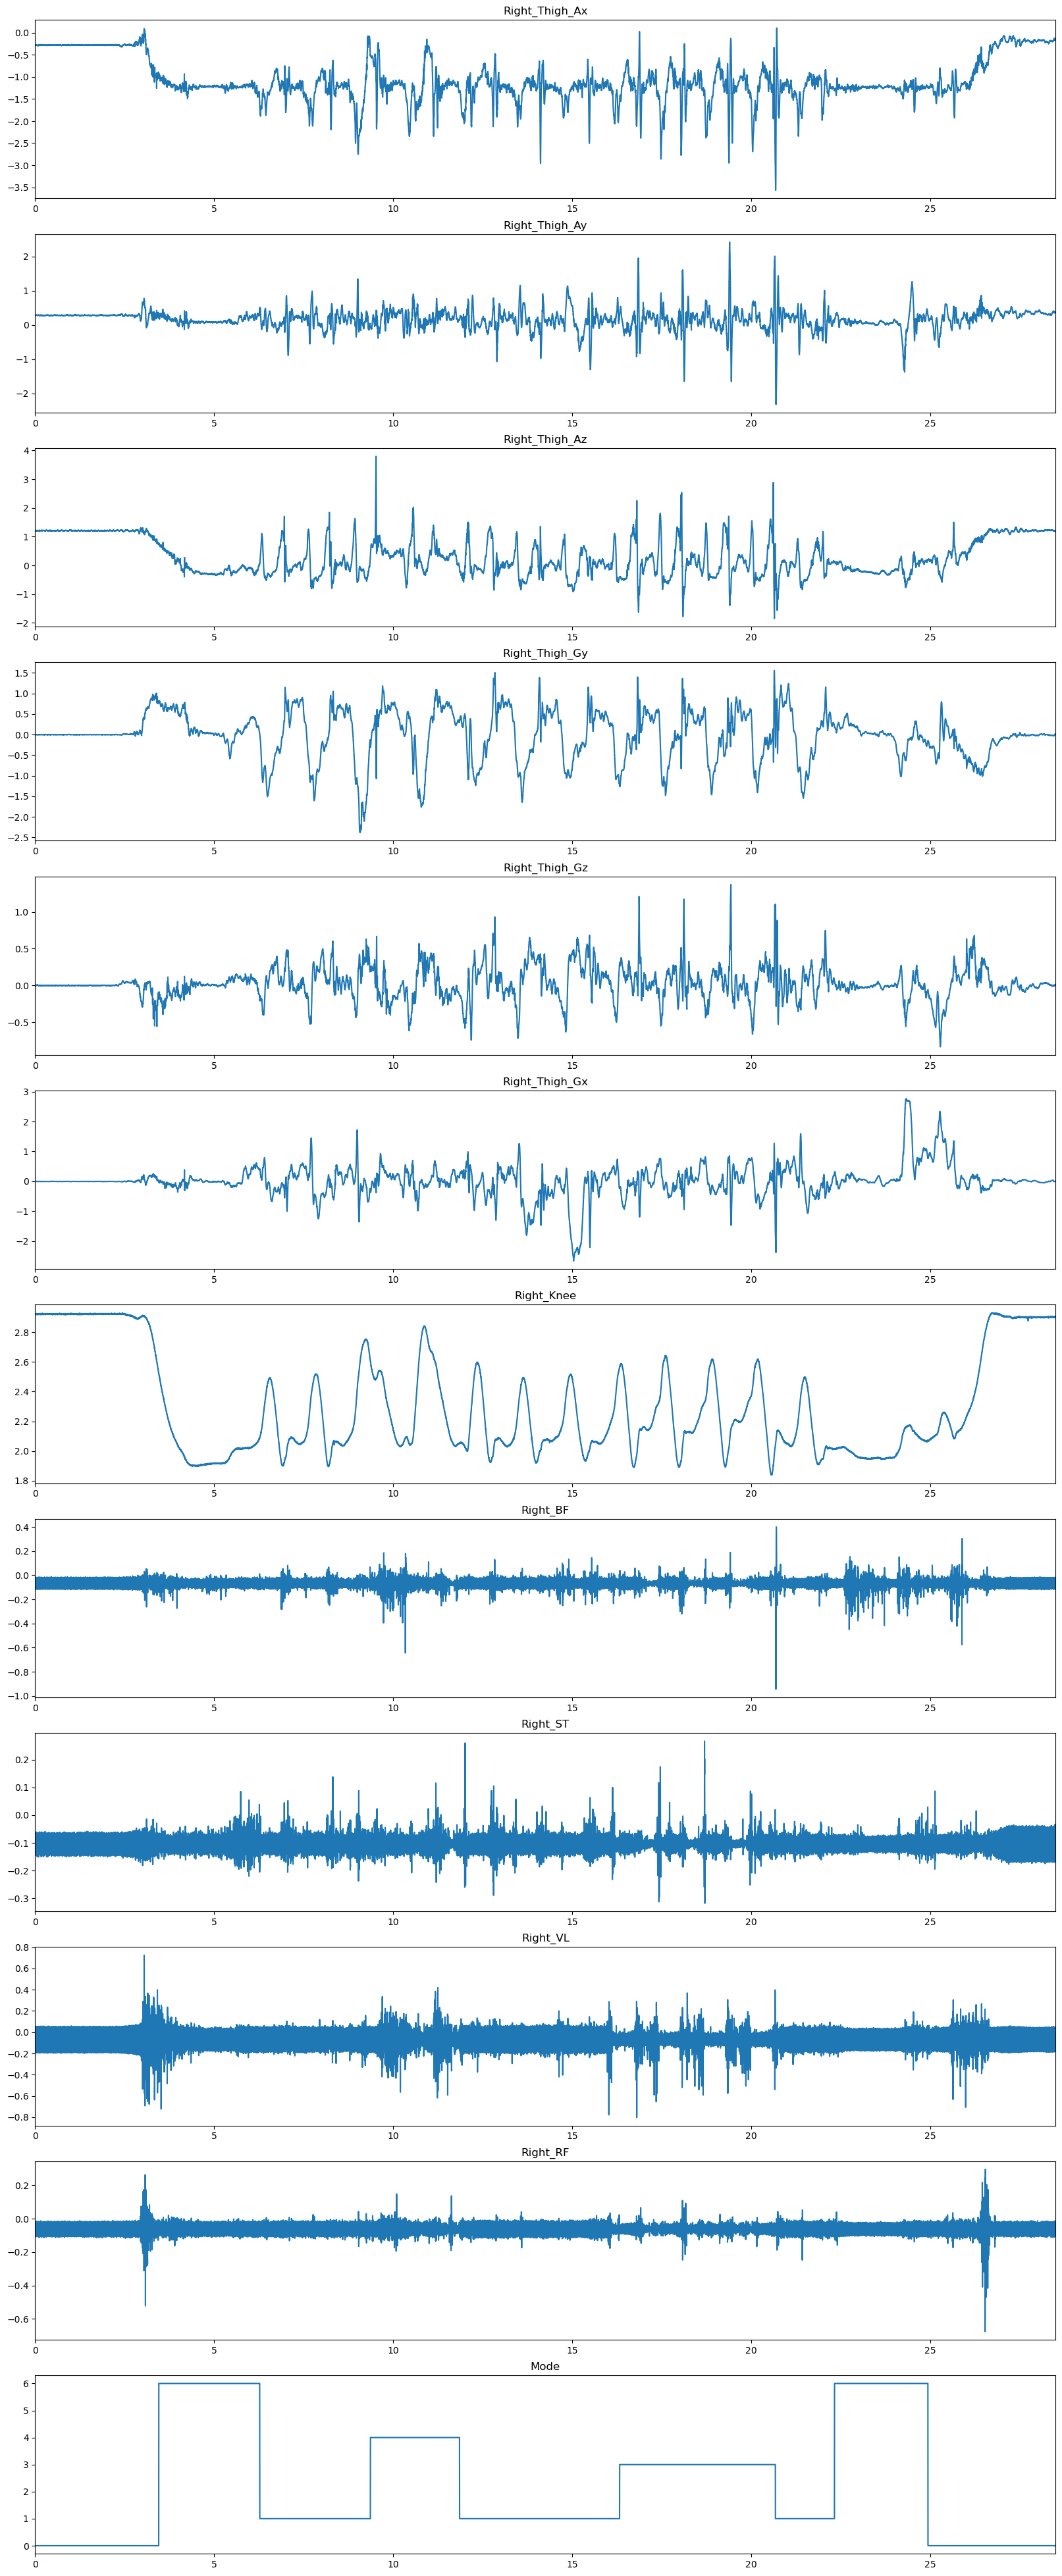

In [153]:
#raw
fig_1 = plt.figure(figsize=(20, 50))
for i in range(12):
    plt.subplot(12, 1, i+1)
    df = dr[dr.columns[i]].to_numpy()
    plt.plot(t, df)
    #plt.xlabel('Время, с')
    plt.xlim(0, t_max)
    #plt.ylabel('Амплитуда, В')
    plt.title(dr.columns[i])

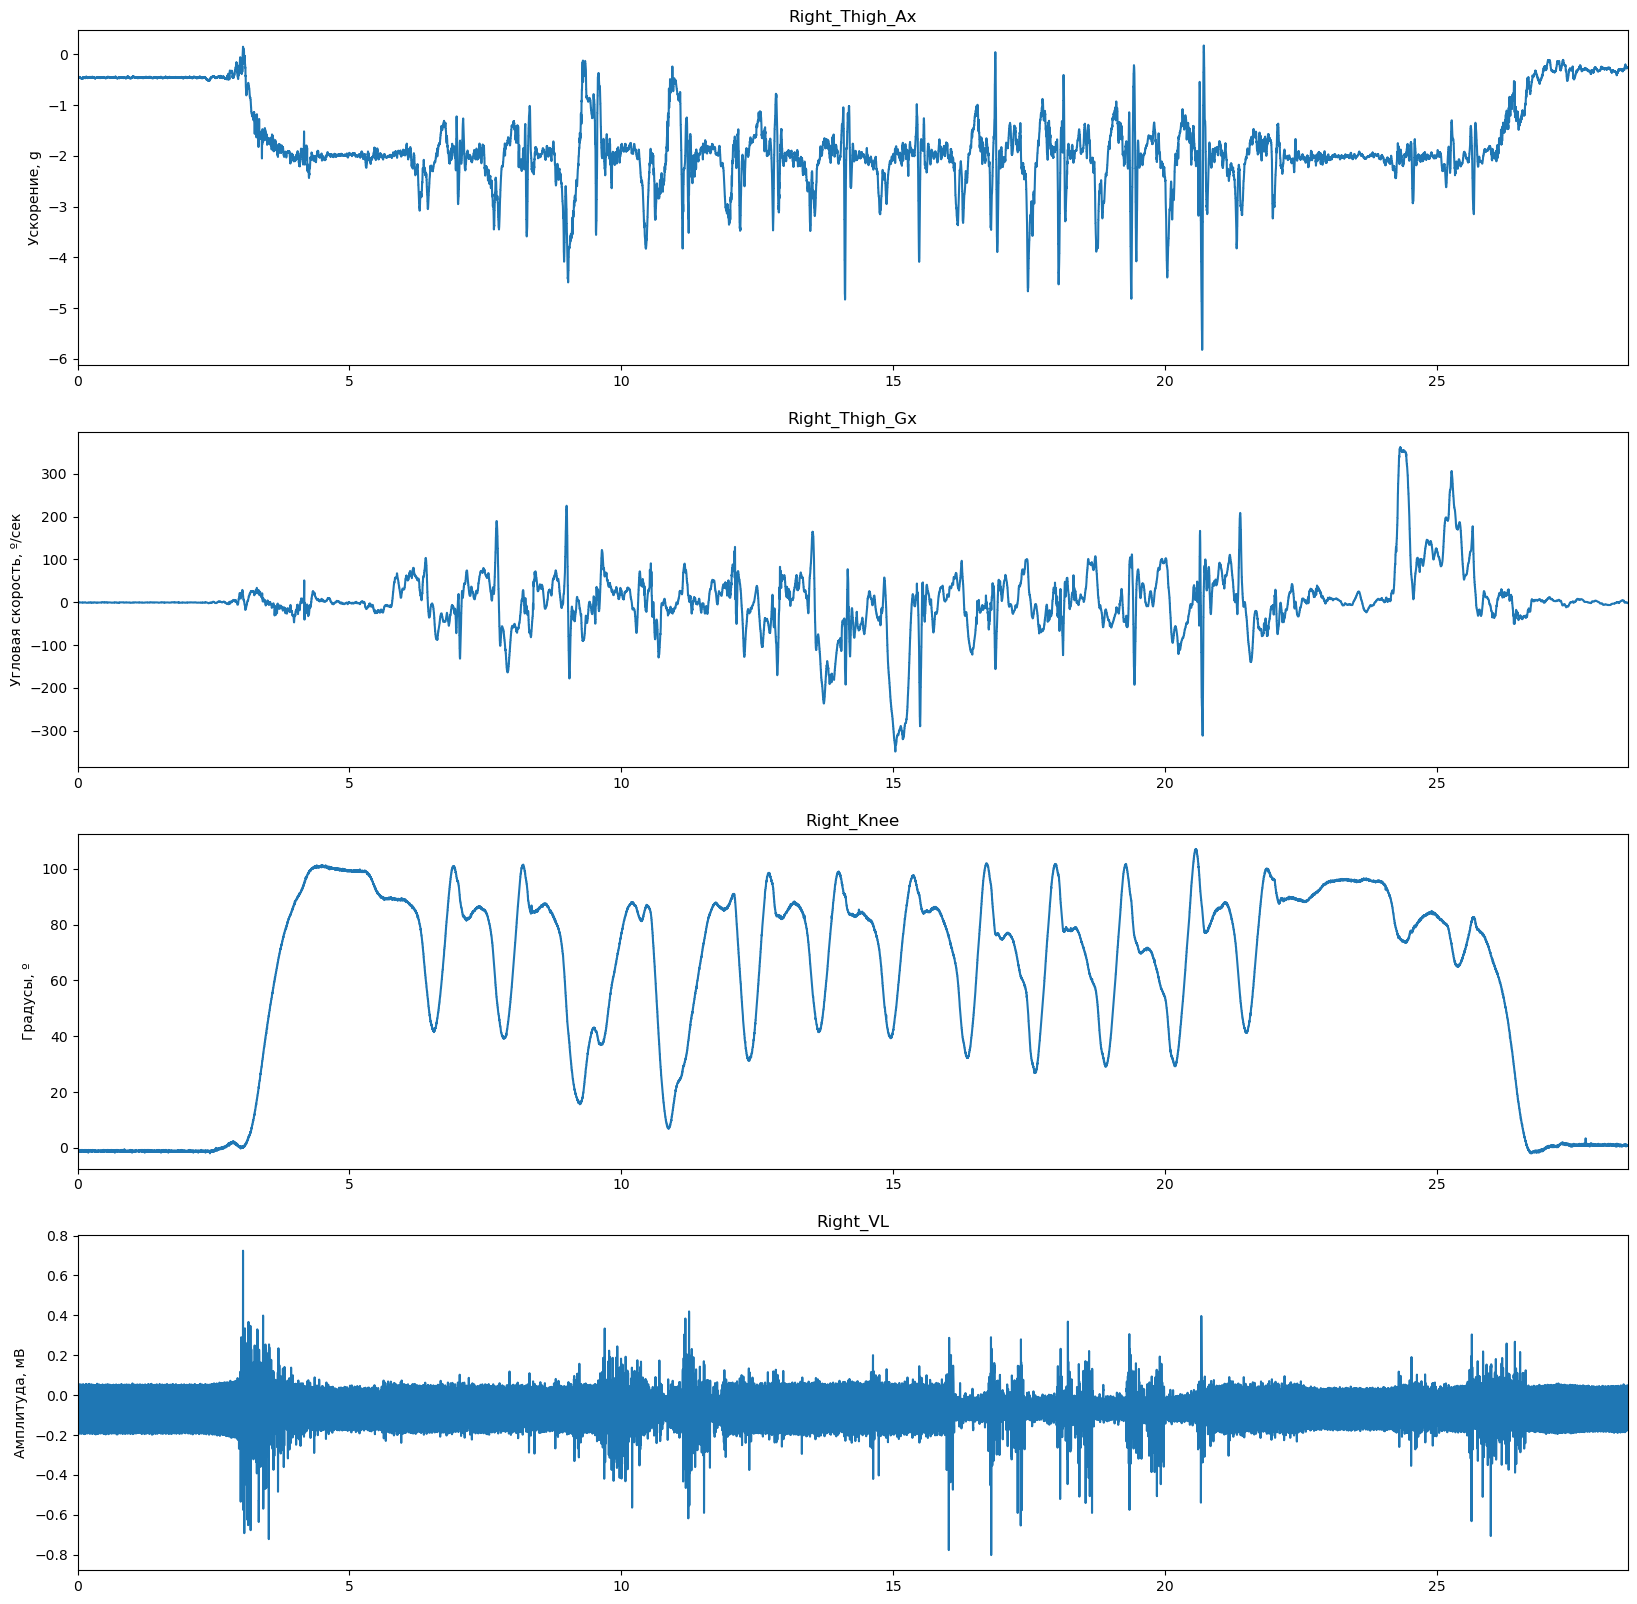

In [154]:
fig_1 = plt.figure(figsize=(20, 20))

plt.subplot(4, 1, 1)
plt.plot(t, 16/9.8*dr[dr.columns[0]].to_numpy())
plt.ylabel('Ускорение, g')
plt.title(dr.columns[0])
plt.xlim(0, t_max)
plt.subplot(4, 1, 2)
plt.plot(t, 131*dr[dr.columns[5]].to_numpy())
plt.ylabel('Угловая скорость, º/сек')
plt.title(dr.columns[5])
plt.xlim(0, t_max)
plt.subplot(4, 1, 3)
plt.plot(t, 100*(2.91 - dr[dr.columns[6]].to_numpy()))
plt.ylabel('Градусы, º')
plt.title(dr.columns[6])
plt.xlim(0, t_max)
plt.subplot(4, 1, 4)
plt.plot(t, dr[dr.columns[9]].to_numpy())
plt.ylabel('Амплитуда, мВ')
plt.xlim(0, t_max)
plt.title(dr.columns[9])
plt.savefig('Raw_4.png')

In [155]:
#filtering
df_plot = pd.DataFrame()
fig_1 = plt.figure(figsize=(20, 50))
for i in range(12):
    df = dr[dr.columns[i]].to_numpy()
    if i<6:
        if i>=3:
            df = df*100
        b, a = butter(10, 25, fs = 1000, btype='lowpass')
        df = lfilter(b, a, df)
    if (i>=7) and (i<11):
        b, a = butter(10, 20, btype='highpass', fs = 1000)
        df = lfilter(b, a, df)
        b, a = butter(10, 450, btype='lowpass', fs = 1000)
        df = lfilter(b, a, df)
        b, a = iirnotch(60, 10, 1000)
        df = lfilter(b, a, df)
    if i==6:
        df = 100*(2.9-df)
        b, a = butter(10, 10, btype='lowpass', fs = 1000)
        df = lfilter(b, a, df)
    
    dr[dr.columns[i]] = df


<Figure size 2000x5000 with 0 Axes>

In [156]:
dr

,Right_Thigh_Ax,Right_Thigh_Ay,Right_Thigh_Az,Right_Thigh_Gy,Right_Thigh_Gz,Right_Thigh_Gx,Right_Knee,Right_BF,Right_ST,Right_VL,Right_RF,Mode
0,-1.557954e-12,1.557113e-12,6.769087e-12,-3.071312e-12,-1.472547e-12,-5.679823e-12,-1.540454e-15,-0.021740,-0.021375,-0.003888,-0.010496,0
1,-3.112248e-11,3.112417e-11,1.353105e-10,-6.208695e-11,-3.062300e-11,-1.137417e-10,-3.173081e-14,-0.051703,-0.040726,0.001310,-0.017665,0
2,-3.100802e-10,3.102825e-10,1.349010e-09,-6.259388e-10,-3.172099e-10,-1.136030e-09,-3.267656e-13,-0.012150,0.011068,0.027662,0.011846,0
3,-2.063795e-09,2.066358e-09,8.984241e-09,-4.214001e-09,-2.191339e-09,-7.579494e-09,-2.253286e-12,0.040749,0.034815,0.015283,0.018937,0
4,-1.036897e-08,1.038774e-08,4.516500e-08,-2.140154e-08,-1.140462e-08,-3.817135e-08,-1.175670e-11,0.045833,-0.003853,-0.042194,-0.010834,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28495,-1.476984e-01,3.753228e-01,1.192060e+00,-2.314510e+00,-6.415996e-01,-8.457232e-01,-1.703727e-01,-0.011029,0.016216,0.037200,0.015381,0
28496,-1.457847e-01,3.728681e-01,1.191957e+00,-2.261821e+00,-5.986261e-01,-9.052822e-01,-1.726544e-01,0.006631,-0.015702,-0.008974,-0.002188,0
28497,-1.438965e-01,3.704133e-01,1.191945e+00,-2.200874e+00,-5.466774e-01,-9.510508e-01,-1.748508e-01,0.008167,-0.016997,-0.026231,-0.009331,0
28498,-1.420606e-01,3.679965e-01,1.192021e+00,-2.131162e+00,-4.865792e-01,-9.829515e-01,-1.769573e-01,0.002287,-0.005164,-0.013232,-0.005378,0


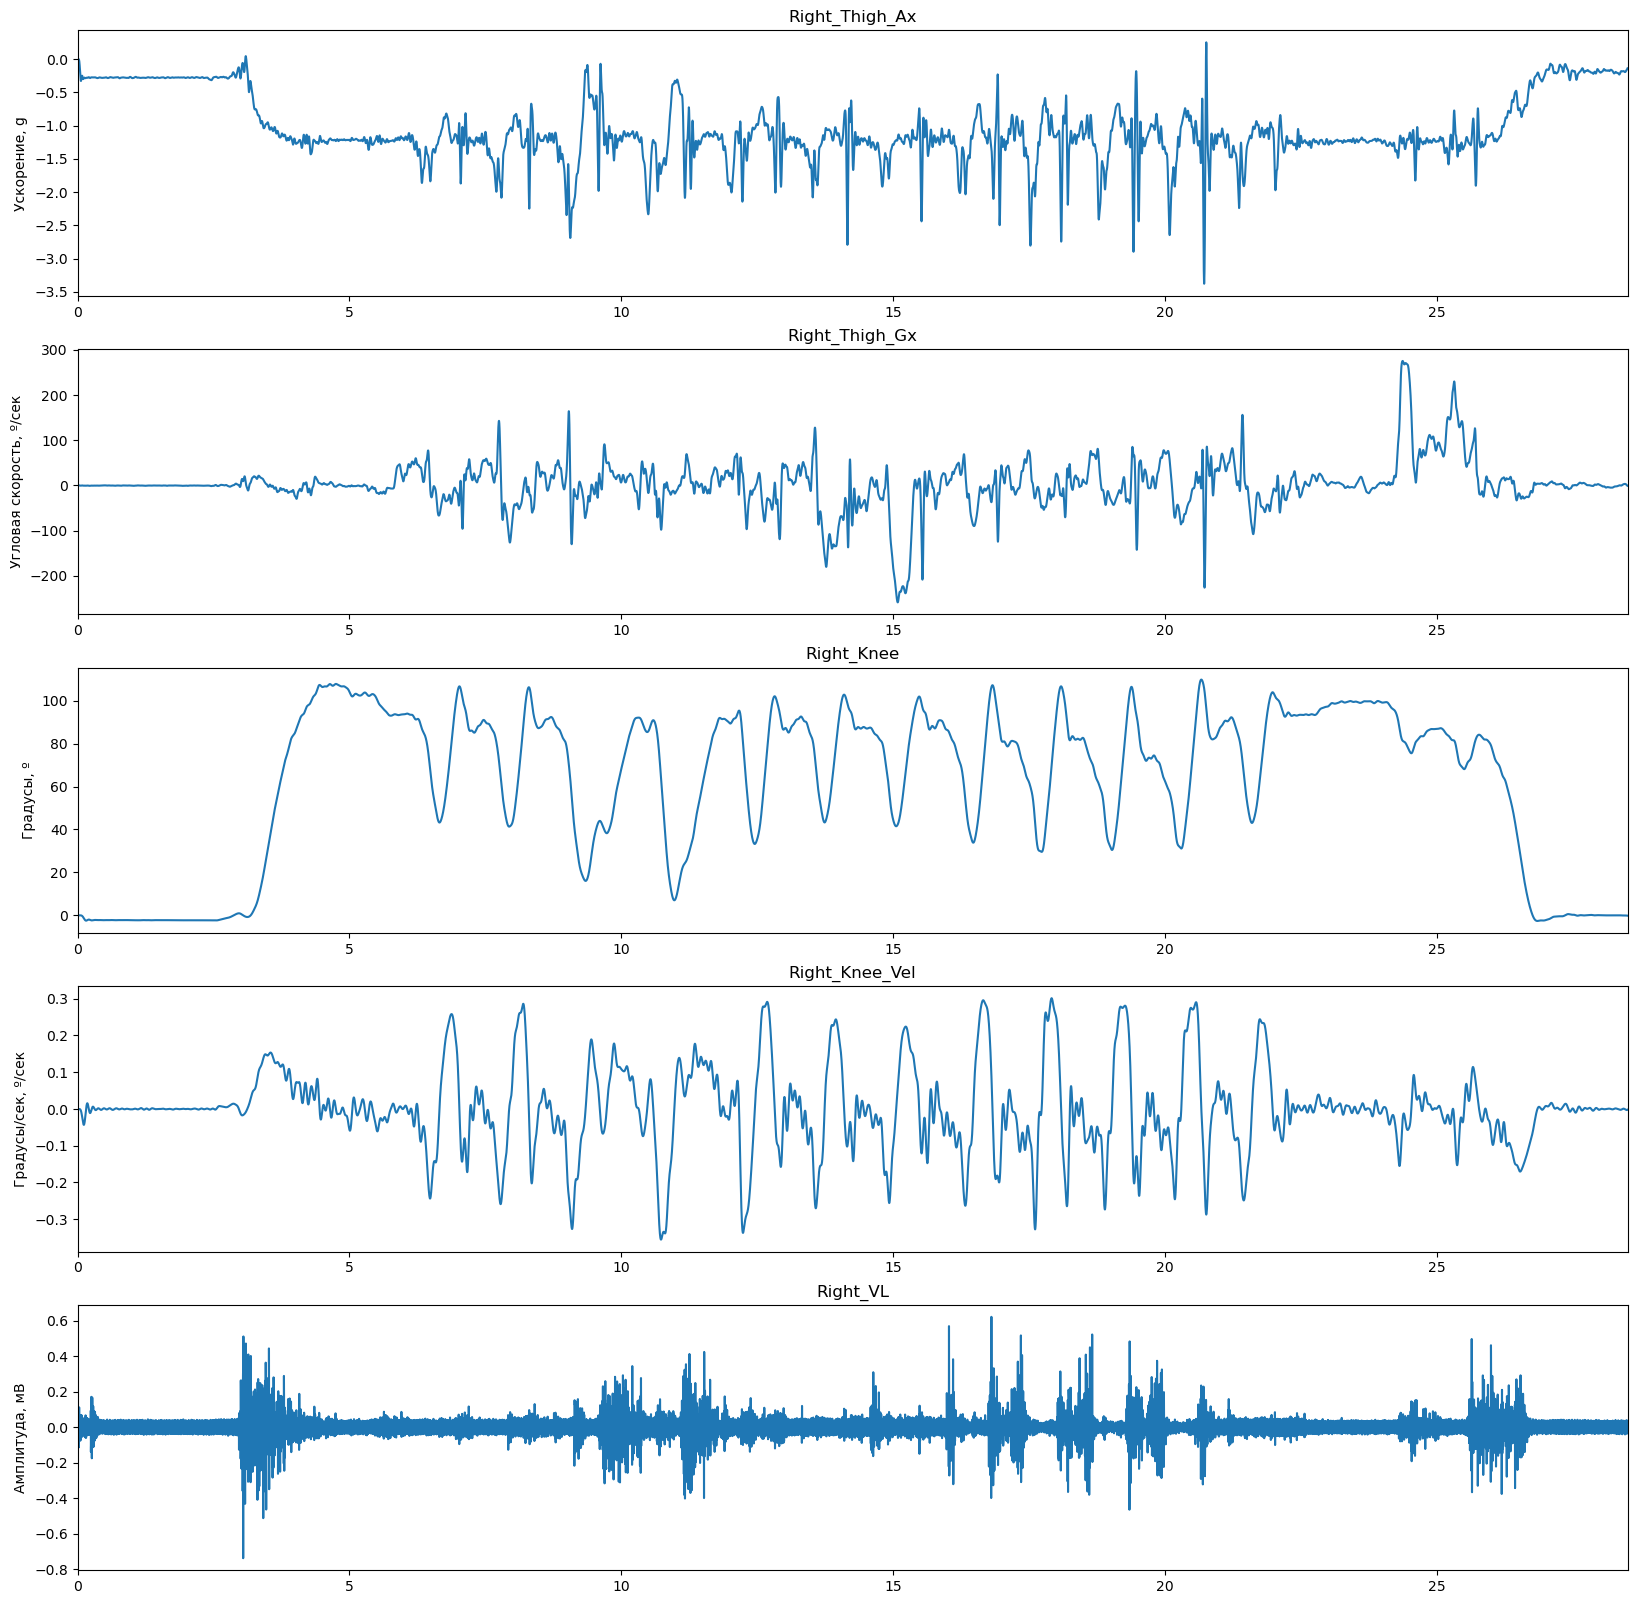

In [160]:
fig_1 = plt.figure(figsize=(20, 20))

plt.subplot(5, 1, 1)
plt.plot(t, dr[dr.columns[0]].to_numpy())
plt.ylabel('Ускорение, g')
plt.title(dr.columns[0])
plt.xlim(0, t_max)

plt.subplot(5, 1, 2)
plt.plot(t, dr[dr.columns[5]].to_numpy())
plt.ylabel('Угловая скорость, º/сек')
plt.title(dr.columns[5])
plt.xlim(0, t_max)

plt.subplot(5, 1, 3)
plt.plot(t, dr[dr.columns[6]].to_numpy())
plt.ylabel('Градусы, º')
plt.title(dr.columns[6])
plt.xlim(0, t_max)

t1 = np.linspace(0, t_max, len(dr['Mode'])-1, endpoint=True) 
plt.subplot(5, 1, 4)
plt.plot(t1, np.diff(dr[dr.columns[6]]))
plt.ylabel('Градусы/сек, º/cек')
plt.title(dr.columns[6]+"_Vel")
plt.xlim(0, t_max)

plt.subplot(5, 1, 5)
plt.plot(t, dr[dr.columns[9]].to_numpy())
plt.ylabel('Амплитуда, мВ')
plt.xlim(0, t_max)
plt.title(dr.columns[9])
plt.savefig('Post_4.png')

In [114]:
b1, a1 = butter(10, 25, fs = 1000, btype='lowpass')
print(b1, a1)
b2, a2 = butter(10, [20, 450], fs=1000, btype='band')
print(b2, a2)
b3, a3 = butter(10, 10, btype='highpass', fs = 1000)
print(b3, a3)
b4, a4 = iirnotch(60, 10, 1000)
print(b4, a4)

[5.51447715e-12 5.51447715e-11 2.48151472e-10 6.61737258e-10
 1.15804020e-09 1.38964824e-09 1.15804020e-09 6.61737258e-10
 2.48151472e-10 5.51447715e-11 5.51447715e-12] [   1.           -8.99594506   36.46330755  -87.69081029  138.55991256
 -150.30211627  113.34865043  -58.67908543   19.9562605    -4.02604302
    0.36586904]
[  0.24151203   0.          -2.41512028   0.          10.86804128
   0.         -28.9814434    0.          50.71752595   0.
 -60.86103115   0.          50.71752595   0.         -28.9814434
   0.          10.86804128   0.          -2.41512028   0.
   0.24151203] [  1.          -1.2122868   -6.47230188   7.31198029  19.78640816
 -20.1927627  -37.36168453  33.33334353  47.97612946 -36.111733
 -43.54819965  26.54949509  28.16475646 -13.21663087 -12.76194804
   4.28795827   3.86322563  -0.82146438  -0.70332318   0.07071034
   0.05832806]
[   0.81802028   -8.18020275   36.8109124   -98.16243306  171.78425785
 -206.14110942  171.78425785  -98.16243306   36.8109124    -8.1

=== a (11) ===
1.0,
-8.995945055354165,
36.46330754988619,
-87.69081028734165,
138.55991255603826,
-150.30211627360606,
113.34865042659041,
-58.679085425977355,
19.956260496222452,
-4.026043021021825,
0.36586904021055866,
=== b (11) ===
5.5144771531267865e-12,
5.514477153126786e-11,
2.481514718907054e-10,
6.617372583752143e-10,
1.1580402021566252e-09,
1.3896482425879502e-09,
1.1580402021566252e-09,
6.617372583752143e-10,
2.481514718907054e-10,
5.514477153126786e-11,
5.5144771531267865e-12,


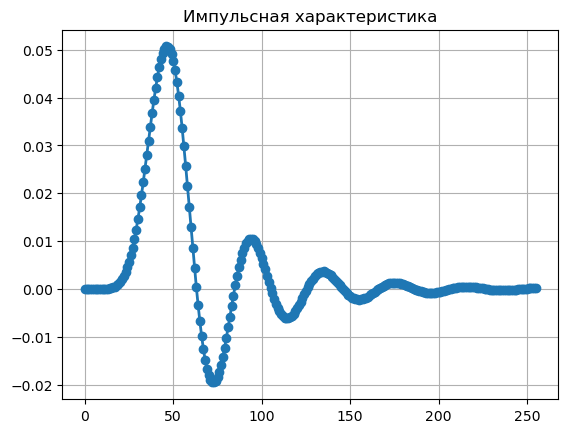

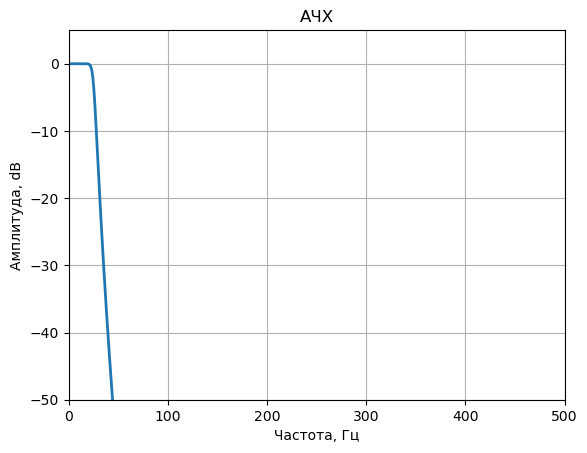

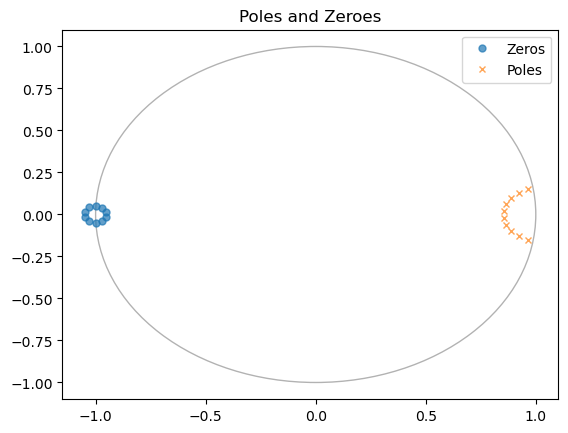

In [163]:
sample_rate = 1000
nyq_rate = sample_rate / 2.0
b1, a1 = b1, a1 = butter(10, 25, fs = 1000, btype='lowpass')

print("=== a ({}) ===".format(a1.size))
for t in a1:
  print("{},".format(t))

print("=== b ({}) ===".format(b1.size))
for t in b1:
  print("{},".format(t))

# Plot the impulse response

idx = np.arange(0, 256)
x = 1.0*(idx == 0)
ir = signal.lfilter(b1, a1, x)

plt.figure(1)
plt.plot(ir, 'o-', linewidth=2)
plt.title('Импульсная характеристика')
plt.grid(True)

# Plot the frequency response

w, h = signal.freqz(b1, a1)

plt.figure(2)
plt.title('АЧХ')
plt.plot((w/np.pi)*nyq_rate, 20 * np.log10(abs(h)), linewidth=2)
plt.ylabel('Амплитуда, dB')
plt.xlabel('Частота, Гц')
plt.grid(True)
plt.ylim(-50, 5)
plt.xlim(0, 500)
# Plot zeros and poles

zeros, poles, _ = signal.tf2zpk(b1, a1)
for m in np.abs(poles):
  if m >= 1.0:
    print("IIR FILTER IS UNSTABLE!")
    break

circle = patches.Circle(
           (0,0), radius=1, fill=False,
           color='black', ls='solid', alpha=0.3)

fig, ax = plt.subplots()
plt.title('Poles and Zeroes')
ax.add_patch(circle)
plt.plot(zeros.real, zeros.imag, 'o', markersize=5,
         alpha=0.7, label = "Zeros")
plt.plot(poles.real, poles.imag, 'x', markersize=5,
         alpha=0.7, label = "Poles")
plt.legend(loc = 'upper right')

plt.show()

=== a (21) ===
1.0,
-1.2122867978310818,
-6.4723018840637465,
7.311980289208302,
19.786408158247227,
-20.19276269626585,
-37.36168452601174,
33.33334352763753,
47.97612945959281,
-36.111732995944784,
-43.5481996482952,
26.549495086870664,
28.164756460970466,
-13.216630867301731,
-12.761948040559354,
4.287958273119002,
3.863225632904543,
-0.8214643796847353,
-0.7033231773232561,
0.07071033688691922,
0.05832805983990379,
=== b (21) ===
0.24151202835448624,
0.0,
-2.415120283544862,
0.0,
10.86804127595188,
0.0,
-28.98144340253835,
0.0,
50.71752595444211,
0.0,
-60.86103114533053,
0.0,
50.71752595444211,
0.0,
-28.98144340253835,
0.0,
10.86804127595188,
0.0,
-2.415120283544862,
0.0,
0.24151202835448624,


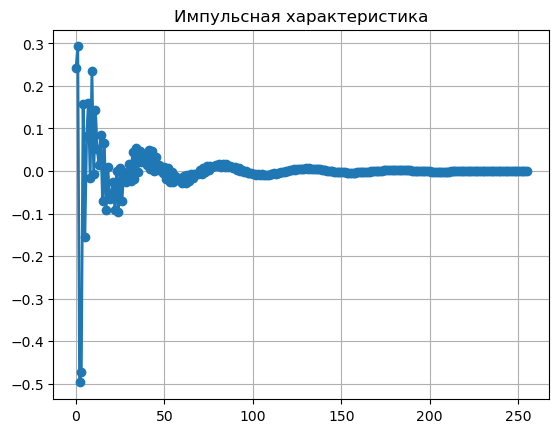

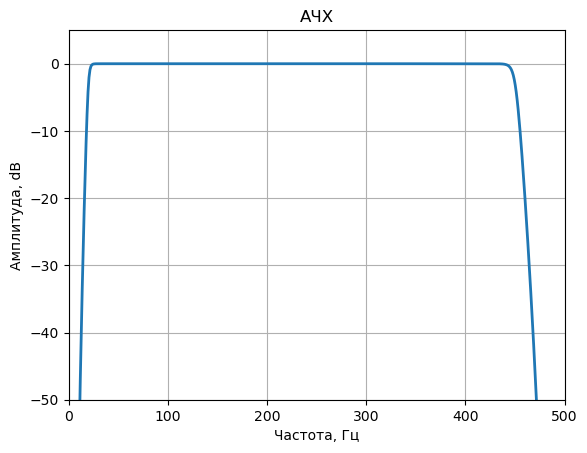

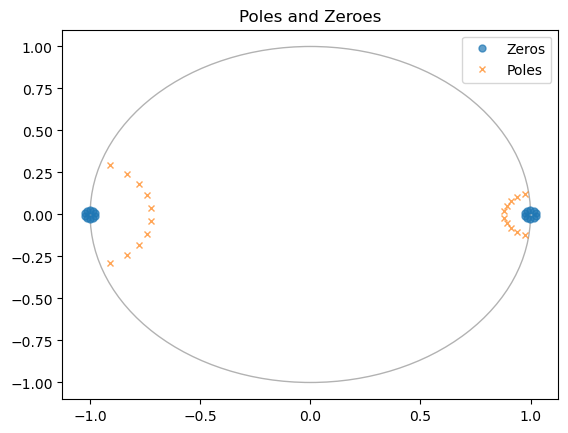

In [164]:
sample_rate = 1000
nyq_rate = sample_rate / 2.0
b1, a1 = b2, a2 = butter(10, [20, 450], fs=1000, btype='band')

print("=== a ({}) ===".format(a1.size))
for t in a1:
  print("{},".format(t))

print("=== b ({}) ===".format(b1.size))
for t in b1:
  print("{},".format(t))

# Plot the impulse response

idx = np.arange(0, 256)
x = 1.0*(idx == 0)
ir = signal.lfilter(b1, a1, x)

plt.figure(1)
plt.plot(ir, 'o-', linewidth=2)
plt.title('Импульсная характеристика')
plt.grid(True)

# Plot the frequency response

w, h = signal.freqz(b1, a1)

plt.figure(2)
plt.title('АЧХ')
plt.plot((w/np.pi)*nyq_rate, 20 * np.log10(abs(h)), linewidth=2)
plt.ylabel('Амплитуда, dB')
plt.xlabel('Частота, Гц')
plt.grid(True)
plt.ylim(-50, 5)
plt.xlim(0, 500)
# Plot zeros and poles

zeros, poles, _ = signal.tf2zpk(b1, a1)
for m in np.abs(poles):
  if m >= 1.0:
    print("IIR FILTER IS UNSTABLE!")
    break

circle = patches.Circle(
           (0,0), radius=1, fill=False,
           color='black', ls='solid', alpha=0.3)

fig, ax = plt.subplots()
plt.title('Poles and Zeroes')
ax.add_patch(circle)
plt.plot(zeros.real, zeros.imag, 'o', markersize=5,
         alpha=0.7, label = "Zeros")
plt.plot(poles.real, poles.imag, 'x', markersize=5,
         alpha=0.7, label = "Poles")
plt.legend(loc = 'upper right')

plt.show()

=== a (11) ===
1.0,
-9.598354771449321,
41.465579275644394,
-106.17335491364825,
178.44005555846908,
-205.67954827681842,
164.6664856685529,
-90.41478757937853,
32.58510336315098,
-6.9603354955900985,
0.669157171068016,
=== b (11) ===
7.6858498499845595e-16,
7.68584984998456e-15,
3.458632432493052e-14,
9.223019819981471e-14,
1.6140284684967575e-13,
1.936834162196109e-13,
1.6140284684967575e-13,
9.223019819981471e-14,
3.458632432493052e-14,
7.68584984998456e-15,
7.6858498499845595e-16,


/usr/lib/python3/dist-packages/scipy/signal/_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


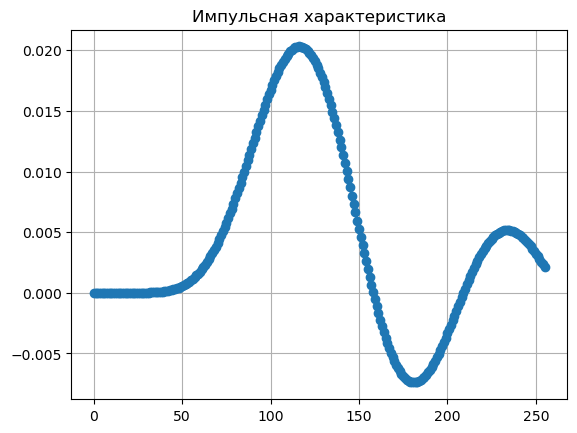

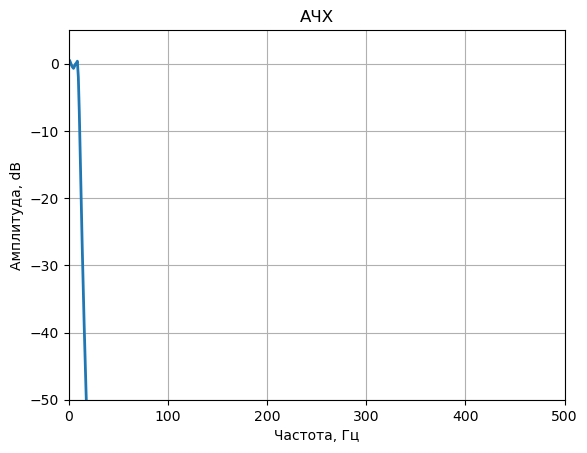

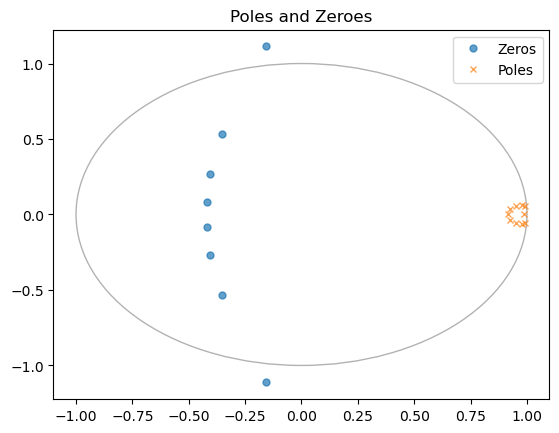

In [165]:
sample_rate = 1000
nyq_rate = sample_rate / 2.0
b1, a1 = b3, a3 = butter(10, 10, btype='lowpass', fs = 1000)

print("=== a ({}) ===".format(a1.size))
for t in a1:
  print("{},".format(t))

print("=== b ({}) ===".format(b1.size))
for t in b1:
  print("{},".format(t))

# Plot the impulse response

idx = np.arange(0, 256)
x = 1.0*(idx == 0)
ir = signal.lfilter(b1, a1, x)

plt.figure(1)
plt.plot(ir, 'o-', linewidth=2)
plt.title('Импульсная характеристика')
plt.grid(True)

# Plot the frequency response

w, h = signal.freqz(b1, a1)

plt.figure(2)
plt.title('АЧХ')
plt.plot((w/np.pi)*nyq_rate, 20 * np.log10(abs(h)), linewidth=2)
plt.ylabel('Амплитуда, dB')
plt.xlabel('Частота, Гц')
plt.grid(True)
plt.ylim(-50, 5)
plt.xlim(0, 500)
# Plot zeros and poles

zeros, poles, _ = signal.tf2zpk(b1, a1)
for m in np.abs(poles):
  if m >= 1.0:
    print("IIR FILTER IS UNSTABLE!")
    break

circle = patches.Circle(
           (0,0), radius=1, fill=False,
           color='black', ls='solid', alpha=0.3)

fig, ax = plt.subplots()
plt.title('Poles and Zeroes')
ax.add_patch(circle)
plt.plot(zeros.real, zeros.imag, 'o', markersize=5,
         alpha=0.7, label = "Zeros")
plt.plot(poles.real, poles.imag, 'x', markersize=5,
         alpha=0.7, label = "Poles")
plt.legend(loc = 'upper right')

plt.show()

=== a (3) ===
1.0,
-1.8251457105120343,
0.9629940509502153,
=== b (3) ===
0.9814970254751076,
-1.8251457105120343,
0.9814970254751076,


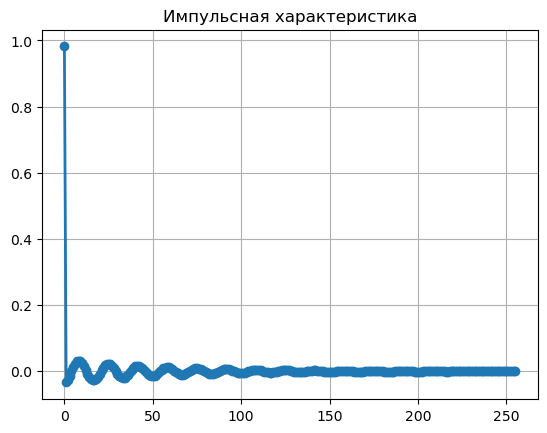

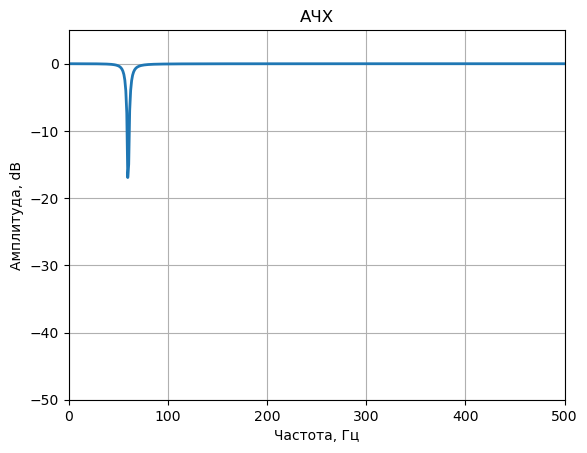

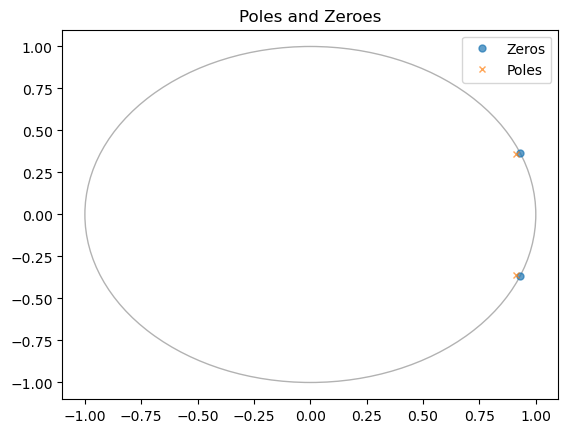

In [166]:
sample_rate = 1000
nyq_rate = sample_rate / 2.0
b1, a1 = b4, a4 = iirnotch(60, 10, 1000)

print("=== a ({}) ===".format(a1.size))
for t in a1:
  print("{},".format(t))

print("=== b ({}) ===".format(b1.size))
for t in b1:
  print("{},".format(t))

# Plot the impulse response

idx = np.arange(0, 256)
x = 1.0*(idx == 0)
ir = signal.lfilter(b1, a1, x)

plt.figure(1)
plt.plot(ir, 'o-', linewidth=2)
plt.title('Импульсная характеристика')
plt.grid(True)

# Plot the frequency response

w, h = signal.freqz(b1, a1)

plt.figure(2)
plt.title('АЧХ')
plt.plot((w/np.pi)*nyq_rate, 20 * np.log10(abs(h)), linewidth=2)
plt.ylabel('Амплитуда, dB')
plt.xlabel('Частота, Гц')
plt.grid(True)
plt.ylim(-50, 5)
plt.xlim(0, 500)
# Plot zeros and poles

zeros, poles, _ = signal.tf2zpk(b1, a1)
for m in np.abs(poles):
  if m >= 1.0:
    print("IIR FILTER IS UNSTABLE!")
    break

circle = patches.Circle(
           (0,0), radius=1, fill=False,
           color='black', ls='solid', alpha=0.3)

fig, ax = plt.subplots()
plt.title('Poles and Zeroes')
ax.add_patch(circle)
plt.plot(zeros.real, zeros.imag, 'o', markersize=5,
         alpha=0.7, label = "Zeros")
plt.plot(poles.real, poles.imag, 'x', markersize=5,
         alpha=0.7, label = "Poles")
plt.legend(loc = 'upper right')

plt.show()